# Inversion du tourbillon potentiel quasi-géostrophique (TPQG) sur des cas idéalisés

**Auteur : FERRY Frédéric (DESR/ENM/C3M) - février 2023**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from processus_id import processus_tpqg_id
from init_id import N300, N600, NZ, N500

In [16]:
processus_tpqg_id?

# Inversion d'une anomalie de TPQG

<div class="alert alert-warning">
<b>Instructions : </b>
<p><b>1) </b> Exécuter l'opération d'inversion d'une anomalie positive de TPQG de forme sphérique à 500hPa. Commenter les anomalies de géopotentiel, de tourbillon, de température et de stabilité statique associées à cette anomalie de TPQG. Quelle est la circulation secondaire associée à cette anomalie de TPQG ?
<p><b>2) </b> Mêmes questions pour une anomalie négative de TPQG de forme sphérique à 500hPa.
<p><b>3) </b> Tester l'impact de la forme de l'anomalie de TPQG (fine/large) sur l'amplitude des anomalies de tourbillon et de température / stabilité statique.
</div>

<div class="alert alert-success">
<b>Réponses : </b>
<p>
</p>
</div>

In [17]:
level=int(input("Niveau (500/300) ? "))
sign=input("Signe (+/-) ? ")
form=input("Forme (sphere/fine/large) ? ")

if level==500:
    N=N500
if level==300:
    N=N300

Niveau (500/300) ? 500
Signe (+/-) ? +
Forme (sphere/fine/large) ? sphere


In [18]:
#processus_tpqg_id(alt, type_ano, signe, forme, bc, signebc, tilt)
# alt : niveau vertical du centre de l'anomalie en hPa.
# type_ano : type d'anomalie à créer ("simple" / "double")
# signe : signe de l'anomalie dans le cas d'une anomalie simple ("+" / "-")
# forme : forme de l'anomalie dans le cas d'une anomalie simple ("sphere" / "fine" / "large")
# bc : variable pour choisir si on veut ajouter une anomalie de basses couches (True / False)
# signebc : signe de l'anomalie de basses couches à ajouter ()"+" / "-")
# tilt : valeur de décalage entre l'anomalie d'altitude et l'anomalie de basses couches en degrés (multiple de 0.5).

ZSTAR, LATS, LONS, lat0, lon0, U_INI, V_INI, FF_INI, ANO, DPHI, DU, DV, \
U_ANO, V_ANO, FF_ANO, TH_INI, TH_ANO, DTR, OMEGA_INI,OMEGA_ANO, DOMEGA \
= processus_tpqg_id(level, "simple", sign, form)

In [19]:
XX1, YY1 = np.meshgrid(LONS, LATS)
 
ZSTAR1=[]
for niv in range(NZ):
    if ZSTAR[niv]<=14000.:
        ZSTAR1.append(ZSTAR[niv])

YY, ZZ1 = np.meshgrid(LATS, ZSTAR1)
XX, ZZ2 = np.meshgrid(LONS, ZSTAR1)

NZ2 = len(ZSTAR1)
NLAT = DOMEGA.shape[1]
NLON = DOMEGA.shape[2]
 
THANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    THANO_coupe[niv-(NZ-NZ2),:,:]=TH_ANO[niv,:,:]   
    
DU_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DU_coupe[niv-(NZ-NZ2),:,:]=DU[niv,:,:]   
    
DV_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DV_coupe[niv-(NZ-NZ2),:,:]=DV[niv,:,:]   
    
ANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    ANO_coupe[niv-(NZ-NZ2),:,:]=ANO[niv,:,:]  

#OMEGA_ANO : Tableau 3D du champ de vitesse verticale avec anomalie.        
#OMEGA_ANO_coupe=np.zeros((NZ2,NLAT,NLON))
#for niv in range(NZ-NZ2,NZ):
#    OMEGA_ANO_coupe[niv-(NZ-NZ2),:,:]=OMEGA_ANO[niv,:,:]

#DOMEGA : Tableau 3D du champ d'anomalie de vitesse verticale.
OMEGA_ANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    OMEGA_ANO_coupe[niv-(NZ-NZ2),:,:]=DOMEGA[niv,:,:] 
    
DPHI_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DPHI_coupe[niv-(NZ-NZ2),:,:]=DPHI[niv,:,:]        
    
DTR_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DTR_coupe[niv-(NZ-NZ2),:,:]=DTR[niv,:,:]

U_ini_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    U_ini_coupe[niv-(NZ-NZ2),:,:]=U_INI[niv,:,:]     

TH_INI_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    TH_INI_coupe[niv-(NZ-NZ2),:,:]=TH_INI[niv,:,:]
    
print(ANO.shape) # lev, lat, lon
print(np.max(ANO))
level=int(round(ZSTAR[N],0))
print(level)
print(LONS[lon0])
print(ZZ1.shape)

(22, 41, 41)
0.0005
5520
-30.0
(19, 41)


In [20]:
import xarray as xr
df = xr.DataArray(ANO_coupe, coords=[ ('lev', ZSTAR1), ('lat', LATS), ('lon', LONS)])
df.to_netcdf('PV_'+sign+'_'+form+'.nc')

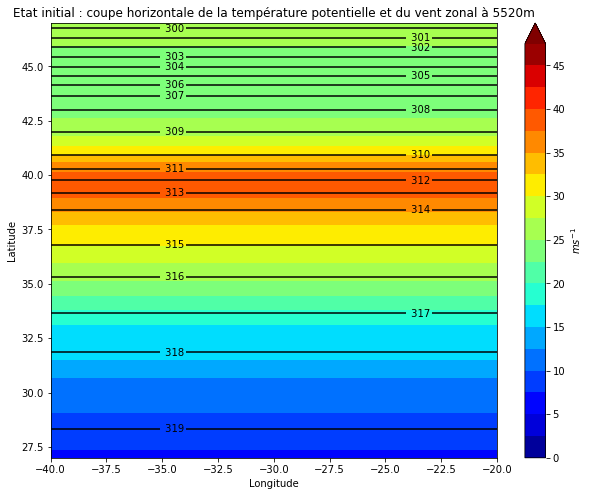

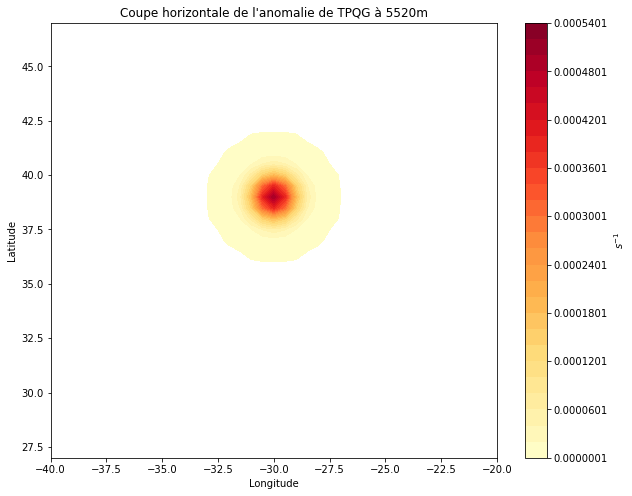

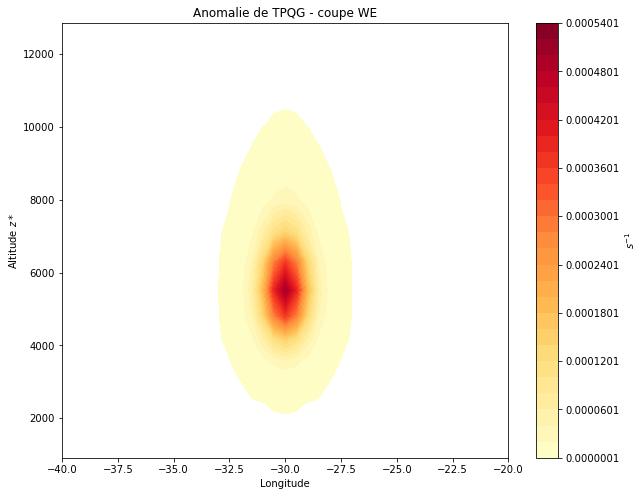

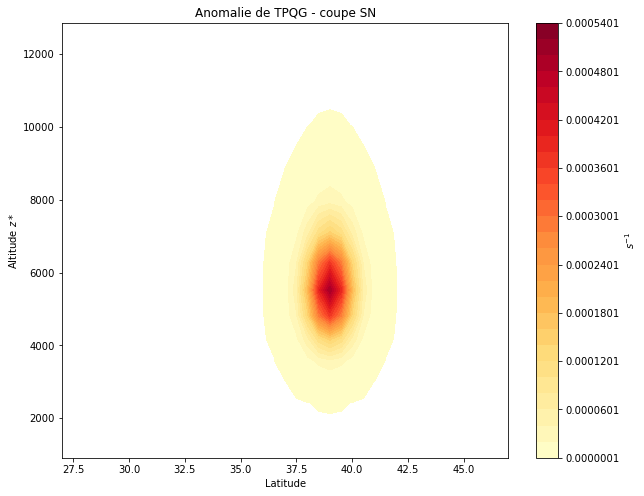

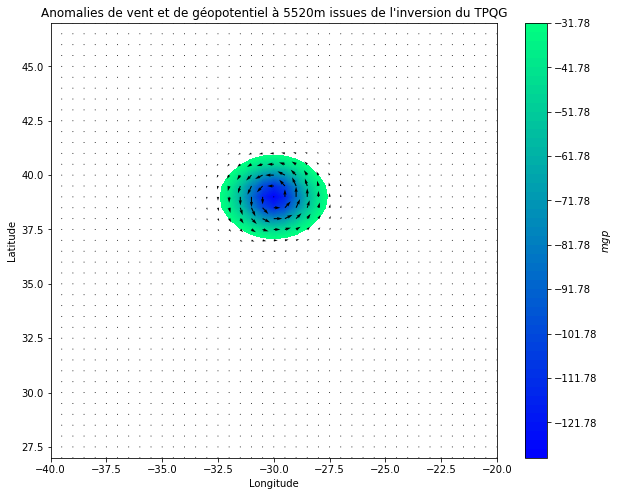

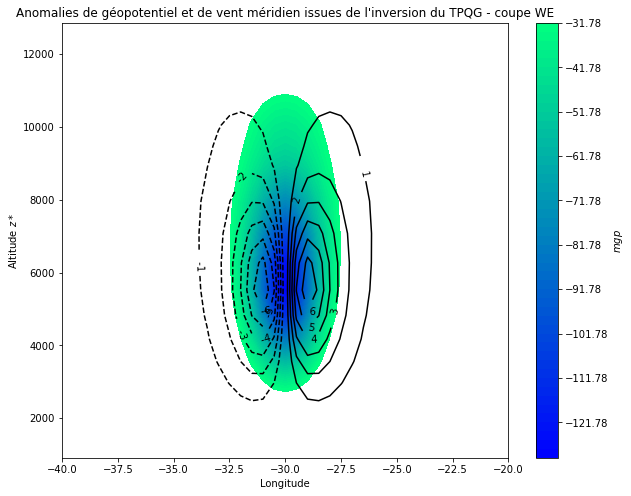

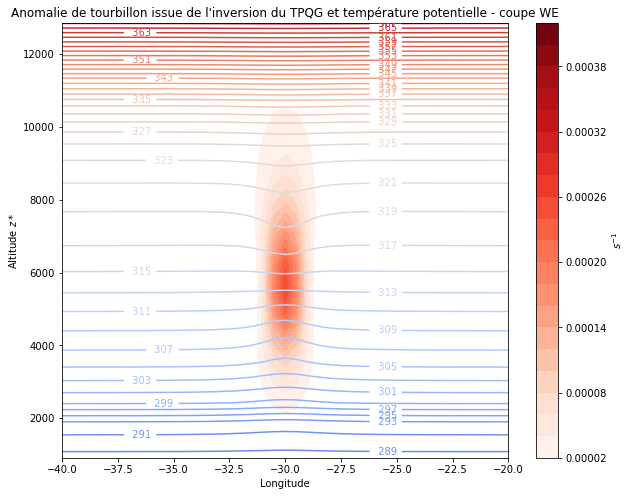

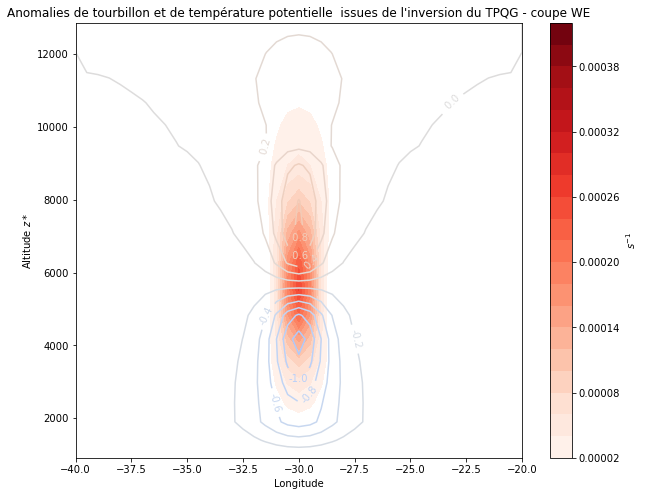

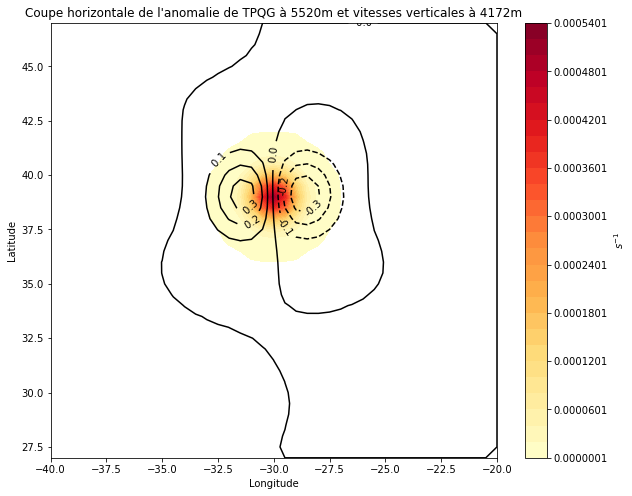

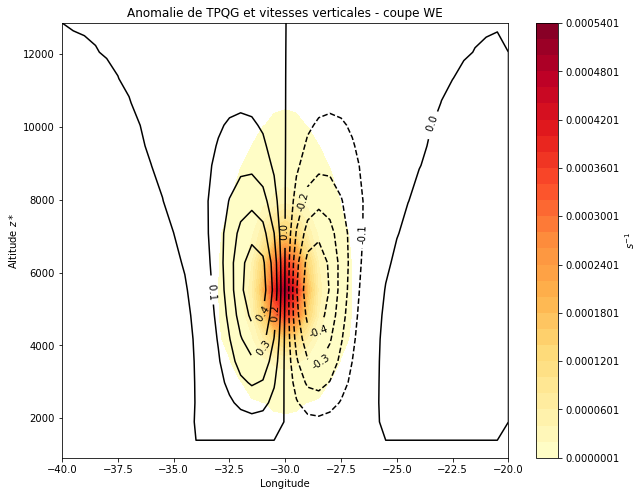

In [21]:
listheta = np.arange(5*np.min(THANO_coupe//5), 5*np.max(THANO_coupe//5), 2)
listh = np.arange(300,400,1)
lisff1 = np.arange(0,50,2.5)

if sign=='+':
    listpqg = np.arange(0.01, 55, 2) * 10 ** (-5)
    cmap_tpqg = "YlOrRd"
if sign=='-':
    listpqg = np.arange(-55, -0.01, 2) * 10 ** (-5)
    cmap_tpqg = "YlGnBu_r"

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.title("Etat initial : coupe horizontale de la température potentielle et du vent zonal à "+str(level)+'m')
c1=plt.contour(XX1,YY1,TH_INI[N,:,:],listh,colors='k')
ax.clabel(c1, fmt='%4.1i', fontsize=10)
c=plt.contourf(XX1,YY1,FF_INI[N,:,:],lisff1,extend='max',cmap="jet")
cb=fig.colorbar(c)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cb.set_label('$ms^{-1}$')
fig.savefig('graphes/init_horiz.png')
plt.show()
    
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
c=plt.contourf(XX1, YY1, ANO[N, :, :], listpqg, cmap = cmap_tpqg)
cb=fig.colorbar(c)
cb.set_label('$s^{-1}$')
plt.title("Coupe horizontale de l'anomalie de TPQG à "+str(level)+'m')
plt.show()
fig.savefig('graphes/TPQG_horiz.png')

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Altitude $z*$')
c=plt.contourf(XX, ZZ2, ANO_coupe[:, lat0, :], listpqg, cmap = cmap_tpqg)
cb=fig.colorbar(c)
cb.set_label('$s^{-1}$')
plt.title("Anomalie de TPQG - coupe WE")
plt.show()
fig.savefig('graphes/TPQG_WE.png')

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Latitude')
plt.ylabel('Altitude $z*$')
c=plt.contourf(YY, ZZ1, ANO_coupe[:, :, lon0], listpqg, cmap = cmap_tpqg)
cb=fig.colorbar(c)
plt.title("Anomalie de TPQG - coupe SN")
cb.set_label('$s^{-1}$')
plt.show()
fig.savefig('graphes/TPQG_NS.png')

if sign=='+':
    list_tourb = np.arange(2, 44, 2) * 10 ** (-5)
    cmap_tourb = cmap = "Reds"
    list_phi = np.arange(np.min(DPHI),-30,2)
    cmap_phi = cmap = "winter"
    
if sign=='-':
    list_tourb = np.arange(-44, 0, 2) * 10 ** (-5)
    cmap_tourb = cmap = "winter"
    list_phi = np.arange(2,np.max(DPHI)+21,2)
    cmap_phi = cmap = "Reds"

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
c=plt.contourf(XX1, YY1, DPHI[N, :, :], list_phi, cmap = cmap_phi)
cb=fig.colorbar(c)
cb.set_label('$mgp$')
DU500=np.zeros((len(LATS),len(LONS)))
DV500=np.zeros((len(LATS),len(LONS)))
DU500[:,:]=DU[N,:,:]
DV500[:,:]=DV[N,:,:]
vent = plt.quiver(XX1,YY1,DU500,DV500,linewidth=0.4,scale=300)
plt.title("Anomalies de vent et de géopotentiel à "+str(level)+"m issues de l'inversion du TPQG")
plt.show()
fig.savefig('graphes/Vent_geo_horiz.png')

levs = np.arange(-15, 15, 1)
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Altitude $z*$')
c1=plt.contourf(XX, ZZ2, DPHI_coupe[:, lat0, :], list_phi, cmap = cmap_phi)
cb=fig.colorbar(c1)
cb.set_label('$mgp$')
c=plt.contour(XX, ZZ2, DV_coupe[:, lat0, :], levs[levs!=0], colors='k')
ax.clabel(c, fmt='%4.1i', fontsize=10)
plt.title("Anomalies de géopotentiel et de vent méridien issues de l'inversion du TPQG - coupe WE")
plt.show()
fig.savefig('graphes/geo_V_WE.png')

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Altitude $z*$')
c1=plt.contourf(XX, ZZ2, DTR_coupe[:, lat0, :], list_tourb, cmap = cmap_tourb)
cb=fig.colorbar(c1)
cb.set_label('$s^{-1}$')
c=plt.contour(XX, ZZ2, THANO_coupe[:, lat0, :], listheta, cmap = "coolwarm")
ax.clabel(c, fmt='%4.1i', fontsize=10)
plt.title("Anomalie de tourbillon issue de l'inversion du TPQG et température potentielle - coupe WE")
plt.show()
fig.savefig('graphes/tourb_theta_WE.png')

levs = np.arange(-4, 4.2, 0.2)

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Altitude $z*$')
c1=plt.contourf(XX, ZZ2, DTR_coupe[:, lat0, :], list_tourb, cmap = cmap_tourb)
cb=fig.colorbar(c1)
cb.set_label('$s^{-1}$')
c=plt.contour(XX, ZZ2, THANO_coupe[:, lat0, :]-TH_INI_coupe[:, lat0, :], levs, cmap = "coolwarm")
ax.clabel(c, fmt='%4.1f', fontsize=10)
plt.title("Anomalies de tourbillon et de température potentielle  issues de l'inversion du TPQG - coupe WE")
plt.show()
fig.savefig('graphes/tourb_theta_ano_WE.png')

#VV
levs = np.arange(-2, 2.1, 0.1)

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
c=plt.contourf(XX1, YY1, ANO[N, :, :], listpqg, cmap = cmap_tpqg)
cb=fig.colorbar(c)
cb.set_label('$s^{-1}$')
DOMEGA600=np.zeros((len(LATS),len(LONS)))
DOMEGA600[:,:]=DOMEGA[N600,:,:]
c0=plt.contour(XX1, YY1, DOMEGA600, levs[levs!=0.0], colors='k')
ax.clabel(c0, fmt='%4.1f', fontsize=10)
plt.title("Coupe horizontale de l'anomalie de TPQG à "+str(level)+'m et vitesses verticales à '+str(int(round(ZSTAR[N600],0)))+'m')
plt.show()
fig.savefig('graphes/TPQG_VV_horiz.png')

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.xlabel('Longitude')
plt.ylabel('Altitude $z*$')
c1=plt.contourf(XX, ZZ2, ANO_coupe[:, lat0, :], listpqg, cmap = cmap_tpqg)
cb=fig.colorbar(c1)
cb.set_label('$s^{-1}$')
c=plt.contour(XX, ZZ2, OMEGA_ANO_coupe[:, lat0, :], levs[levs!=0.0], colors='k')
ax.clabel(c, fmt='%4.1f', fontsize=10)
plt.title("Anomalie de TPQG et vitesses verticales - coupe WE")
plt.show()
fig.savefig('graphes/TPQG_VV_WE.png')

<div class="alert alert-warning">
<b>Exercice </b>

L’objectif de cet exercice est de vérifier par une analyse en ordre le grandeur le constat efféctué à la question 3 (influence de la forme d’une anomalie de tourbillon potentiel sur l’amplitude des anomalies de tourbillon et de température). On considère une anomalie de tourbillon potentiel quasi-géostrophique $\tilde{q}$ que l’on exprime en fonction de l’anomalie de pression :
    
$$\tilde{q} = \frac{1}{\rho_0f_0}\Delta_h\tilde{P}+\frac{f_0}{\rho_0N_0^2}\frac{\partial^2 \tilde{P}}{\partial z^2}$$

    
On note $P$ l’ordre de grandeur de l’anomalie de pression. On suppose que l’anomalie de tourbillon potentiel est caractérisée par une échelle horizontale $l$ et une échelle verticale $h$.

<p><b>1) </b> Déterminer l’ordre de grandeur $A$ du terme en tourbillon et l’ordre de grandeur $B$ du terme en stabilité statique.
<p><b>2) </b> Démontrer que la signature en tourbillon d’une l’anomalie de tourbillon potentiel est prépondérante devant sa signature en stabilité statique si l’échelle horizontale de l’anomalie de tourbillon potentiel l est inférieure à   .
</div>

<div class="alert alert-success">
<b>Réponses : </b>
<p>
</p>
</div>

# Inversion d'un dipôle d'anomalies positive/négative de TPQG

<div class="alert alert-warning">
<b>Instructions : </b>
<p><b>1) </b> Exécuter l'opération d'inversion d'un dipôle d'anomalies positive/négative de TPQG au voisinage 300hPa. Quel est le modèle conceptuel décrit par cette configuration idéalisée ?
</div>

<div class="alert alert-success">
<b>Réponses : </b>
<p>
</p>
</div>

In [22]:
ZSTAR, LATS, LONS, lat0, lon0, U_INI, V_INI, FF_INI, ANO, DPHI, DU, DV, \
U_ANO, V_ANO, FF_ANO, TH_INI, TH_ANO, DTR, OMEGA_INI,OMEGA_ANO, DOMEGA \
= processus_tpqg_id(300, "double")

In [23]:
XX1, YY1 = np.meshgrid(LONS, LATS)
 
ZSTAR1=[]
for niv in range(NZ):
    if ZSTAR[niv]<=14000.:
        ZSTAR1.append(ZSTAR[niv])

YY, ZZ1 = np.meshgrid(LATS, ZSTAR1)
XX, ZZ2 = np.meshgrid(LONS, ZSTAR1)

NZ2 = len(ZSTAR1)
NLAT = DOMEGA.shape[1]
NLON = DOMEGA.shape[2]
 
THANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    THANO_coupe[niv-(NZ-NZ2),:,:]=TH_ANO[niv,:,:]   
    
DU_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DU_coupe[niv-(NZ-NZ2),:,:]=DU[niv,:,:]   
    
DV_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DV_coupe[niv-(NZ-NZ2),:,:]=DV[niv,:,:]   
    
ANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    ANO_coupe[niv-(NZ-NZ2),:,:]=ANO[niv,:,:]  
    
OMEGA_ANO_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    OMEGA_ANO_coupe[niv-(NZ-NZ2),:,:]=OMEGA_ANO[niv,:,:]    
    
DPHI_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DPHI_coupe[niv-(NZ-NZ2),:,:]=DPHI[niv,:,:]        
    
DTR_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    DTR_coupe[niv-(NZ-NZ2),:,:]=DTR[niv,:,:]

U_ini_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    U_ini_coupe[niv-(NZ-NZ2),:,:]=U_INI[niv,:,:]     

TH_INI_coupe=np.zeros((NZ2,NLAT,NLON))
for niv in range(NZ-NZ2,NZ):
    TH_INI_coupe[niv-(NZ-NZ2),:,:]=TH_INI[niv,:,:]
    
level2=int(round(ZSTAR[N300],0))

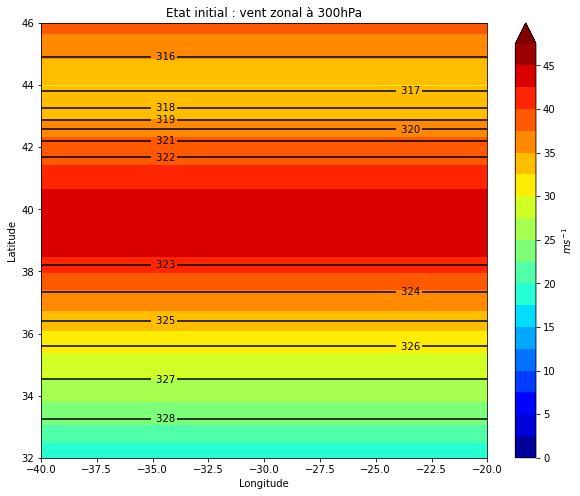

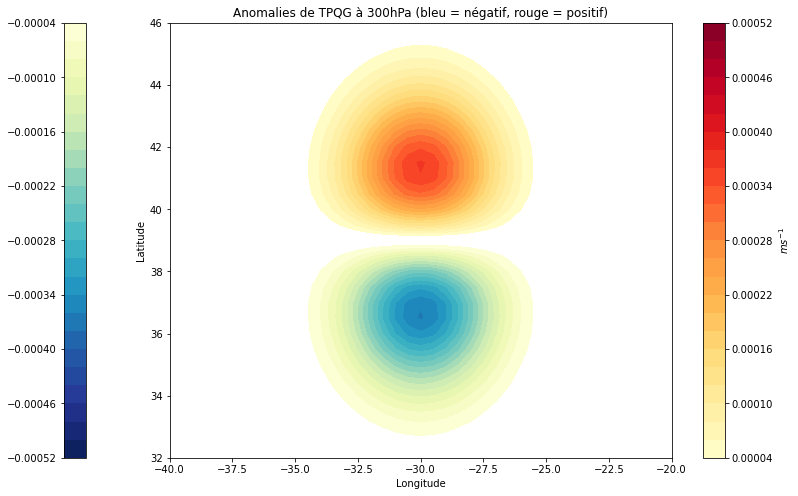

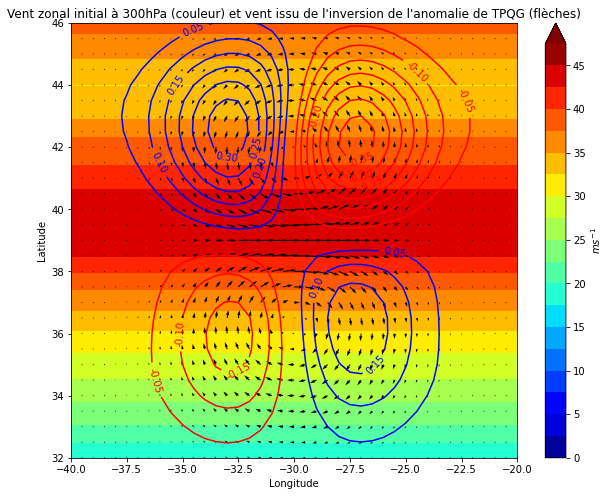

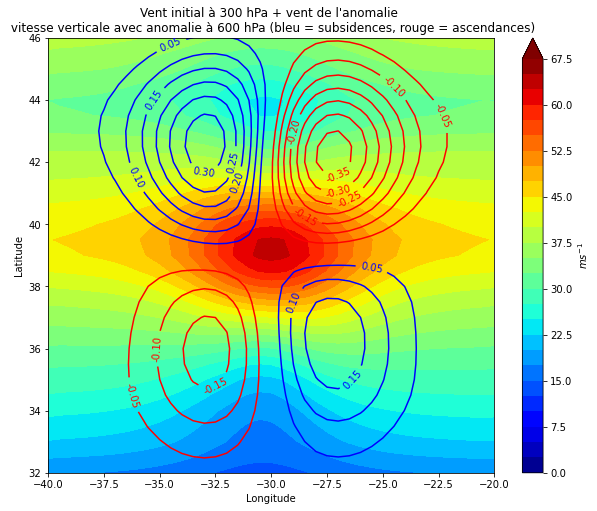

In [24]:
lisvent_positif = np.arange(0.5,np.max(DV)+8,2)
lisvent_negatif = np.arange(np.min(DV),0,2)
lisomega_positif = np.arange(0,1,0.05)
lisomega_negatif = np.arange(-1,0,0.05)
lisff1 = np.arange(0,50,2.5)
lisff2 = np.arange(0,70,2.5)
listh = np.arange(300,400,1)

listpqg_positif = np.arange(4, 54, 2) * 10 ** (-5)
listpqg_negatif = np.arange(-52, -2, 2) * 10 ** (-5)

def plot_graph(ax):
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.ylim(32,46)
    cb.set_label('$ms^{-1}$')
    return ax

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.title("Etat initial : vent zonal à 300hPa")
c1=plt.contour(XX1,YY1,TH_INI[N300,:,:],listh,colors='k')
ax.clabel(c1, fmt='%4.1i', fontsize=10)

c=plt.contourf(XX1,YY1,FF_INI[N300,:,:],lisff1,extend='max',cmap="jet")
cb=fig.colorbar(c)
plot_graph(ax)
fig.savefig('graphes/Jet300.png')
plt.show()

fig = plt.figure(1, figsize=(15, 8))
ax = plt.subplot(111)
plt.title("Anomalies de TPQG à 300hPa (bleu = négatif, rouge = positif)")
c1=plt.contourf(XX1, YY1, ANO[N300, :, :], listpqg_positif, cmap = "YlOrRd")
c2=plt.contourf(XX1, YY1, ANO[N300, :, :], listpqg_negatif, cmap = "YlGnBu_r")
cb=fig.colorbar(c2, location='left')
cb=fig.colorbar(c1, location='right')
plot_graph(ax)
fig.savefig('graphes/TPQG300.png')
plt.show()

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.title("Vent zonal initial à 300hPa (couleur) et vent issu de l'inversion de l'anomalie de TPQG (flèches)")
c=plt.contourf(XX1,YY1,FF_INI[N300,:,:],lisff1,extend='max',cmap="jet")
cb=fig.colorbar(c)
plot_graph(ax)
vent = plt.quiver(XX1,YY1,DU[N300, :, :],DV[N300, :, :],linewidth=0.4,scale=500)
c1=plt.contour(XX1, YY1, DOMEGA[N600, :, :],lisomega_positif[lisomega_positif!=0], linestyles = 'solid', colors = "blue")
ax.clabel(c1, fmt='%4.2f', fontsize=10)
c2=plt.contour(XX1, YY1, DOMEGA[N600, :, :],lisomega_negatif[lisomega_negatif!=0], linestyles = 'solid', colors = "red")
ax.clabel(c2, fmt='%4.2f', fontsize=10)
fig.savefig('graphes/Jet300VV_ano.png')
plt.show()

fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)
plt.title("Vent initial à 300 hPa + vent de l'anomalie \n \
vitesse verticale avec anomalie à 600 hPa (bleu = subsidences, rouge = ascendances)")
c=plt.contourf(XX1,YY1,FF_ANO[N300,:,:],lisff2,extend='max',cmap="jet")
cb=fig.colorbar(c)
plot_graph(ax)
c1=plt.contour(XX1, YY1, DOMEGA[N600, :, :],lisomega_positif[lisomega_positif!=0], linestyles = 'solid', colors = "blue")
ax.clabel(c1, fmt='%4.2f', fontsize=10)
c2=plt.contour(XX1, YY1, DOMEGA[N600, :, :],lisomega_negatif[lisomega_negatif!=0], linestyles = 'solid', colors = "red")
ax.clabel(c2, fmt='%4.2f', fontsize=10)
fig.savefig('graphes/FF300_avec_ano.png')
plt.show()